In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scripts import project_functions as pf

In [3]:
# Load data from National Names
national_df = pf.load_and_process_one('../../data/raw/national/NationalNames.csv')
# Load 4 parts of raw data on State Names
state_df = pf.load_and_process_many("../../data/raw/state")


In [5]:
state_df

,Name,Year,Gender,State,Count
0,Mary,1910,F,AK,14
1,Annie,1910,F,AK,12
2,Anna,1910,F,AK,10
3,Margaret,1910,F,AK,8
4,Helen,1910,F,AK,7
...,...,...,...,...,...
5647421,Seth,2014,M,WY,5
5647422,Spencer,2014,M,WY,5
5647423,Tyce,2014,M,WY,5
5647424,Victor,2014,M,WY,5


## Tasks
- Separate the states into 4 regions: Western, southern, eastern and northern.
- Compare the top five most popular girls/boys name in four different regions (half for Jamie, half for Rita).
- North East and South is the main focus for Jamie.

## Analysis

### Filtering north east and south

In [5]:
# Note that the project_fuctions module includes list of abbreviations for states separated in regions
# Let's slice out only the north east and south

n_df = state_df.loc[state_df["State"].isin(pf.NORTH_EAST)].reset_index(drop=True)
n_df

,Name,Year,Gender,State,Count
0,Mary,1910,F,CT,304
1,Helen,1910,F,CT,170
2,Anna,1910,F,CT,131
3,Margaret,1910,F,CT,99
4,Dorothy,1910,F,CT,90
...,...,...,...,...,...
1077883,Richard,2014,M,VT,5
1077884,Rowan,2014,M,VT,5
1077885,Simon,2014,M,VT,5
1077886,Skyler,2014,M,VT,5


In [6]:
s_df = state_df.loc[state_df["State"].isin(pf.SOUTH)].reset_index(drop=True)
s_df

,Name,Year,Gender,State,Count
0,Mary,1910,F,AL,875
1,Annie,1910,F,AL,482
2,Willie,1910,F,AL,257
3,Mattie,1910,F,AL,232
4,Ruby,1910,F,AL,204
...,...,...,...,...,...
2173016,Pierce,2014,M,WV,5
2173017,Quinton,2014,M,WV,5
2173018,Reece,2014,M,WV,5
2173019,Sterling,2014,M,WV,5


### Find top 5 

In [7]:
# For the north east
n_name = (n_df.groupby(by="Name")
              .aggregate("sum")
              .drop(columns=["Year"]) # We do not analyze with time
#               .assign(Region=lambda x: ["NE" for n in x["Name"]])
              .sort_values(by="Count")
              .reset_index()
         )
top5_n,low5_n = n_name.tail().reset_index(drop=True), n_name.head()

# For the south
s_name = (s_df.groupby(by="Name")
              .aggregate("sum")
              .drop(columns=["Year"]) # We do not analyze with time
              .sort_values(by="Count")
              .reset_index()
         )
top5_s,low5_s = s_name.tail().reset_index(drop=True), n_name.head()

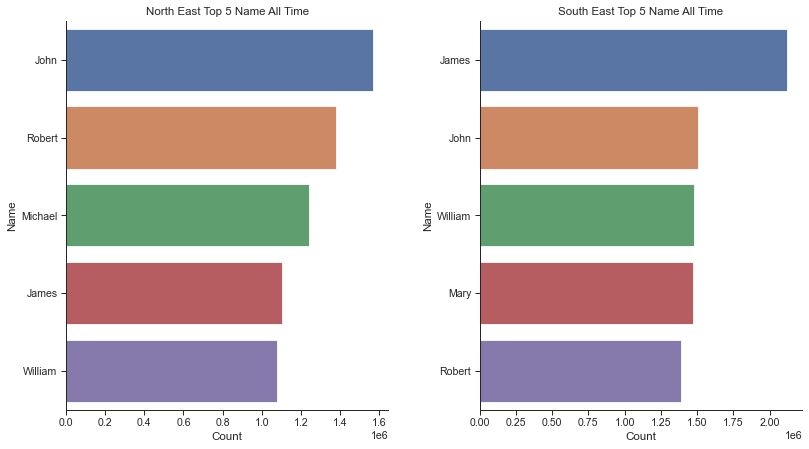

In [45]:
# Check similarity between 2 regions
sns.set_theme(context="paper", style="ticks",  font_scale=1.2)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
# North graph
north = sns.barplot(y="Name",
            x="Count",
            data=top5_n,
            order=reversed(list(top5_n["Name"])),
            ax=ax[0]
            )
north.set_title("North East Top 5 Name All Time")

# South graph
south = sns.barplot(y="Name",
            x="Count",
            data=top5_s,
            order=reversed(list(top5_s["Name"])),
            ax=ax[1])
south.set_title("South East Top 5 Name All Time")

# Show plot
sns.despine()
fig.tight_layout(pad=3.0)
plt.show()